In [50]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

from PIL import Image

import imgkit

In [51]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [52]:
from maskrcnn_benchmark.config import cfg
from my_coco_predictor import COCODemo

In [53]:
config_file = "../configs/my_single_image_test.yaml";

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [54]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    weight_loading = "../model_0005000.pth"
)

find checkpoint1
Loading weight from ../model_0005000.pth.


In [56]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)


In [65]:
coco_dataset.images[]

{0: {'height': 480, 'width': 640, 'id': 0, 'file_name': '4_color.png'},
 1: {'height': 480, 'width': 640, 'id': 1, 'file_name': '5_color.png'},
 2: {'height': 480, 'width': 640, 'id': 2, 'file_name': '15_color.png'},
 3: {'height': 480, 'width': 640, 'id': 3, 'file_name': '3_color.png'},
 4: {'height': 480, 'width': 640, 'id': 4, 'file_name': '6_color.png'},
 5: {'height': 480, 'width': 640, 'id': 5, 'file_name': '12_color.png'},
 6: {'height': 480, 'width': 640, 'id': 6, 'file_name': '9_color.png'},
 7: {'height': 480, 'width': 640, 'id': 7, 'file_name': '0_color.png'},
 8: {'height': 480, 'width': 640, 'id': 8, 'file_name': '11_color.png'},
 9: {'height': 480, 'width': 640, 'id': 9, 'file_name': '19_color.png'},
 10: {'height': 480, 'width': 640, 'id': 10, 'file_name': '18_color.png'},
 11: {'height': 480, 'width': 640, 'id': 11, 'file_name': '1_color.png'},
 12: {'height': 480, 'width': 640, 'id': 12, 'file_name': '16_color.png'},
 13: {'height': 480, 'width': 640, 'id': 13, 'file_n

# Dataset info

In [ ]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

In [57]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img)
    plt.axis("off")
    
def imshow_gt(image_id):
    html = coco_dataset.display_image(image_id, use_url=False)
    IPython.display.HTML(html)

In [80]:
# from http://cocodataset.org/#explore?id=345434
image_id = 4
image = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/" + coco_dataset.images[image_id]["file_name"])
image = np.array(image)

html = coco_dataset.display_image(image_id, use_url=False)
IPython.display.HTML(html)

Image:
  height: 480
  width: 640
  id: 4
  file_name: 6_color.png
  segmentations (8):
    20:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    21:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    22:red:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    23:green:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    24:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    25:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    26:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    27:gold:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}


images in froward =  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x7fe837344240>
tensor([[[[0.1451, 0.1451, 0.2392,  ..., 0.2157, 0.2078, 0.1529],
          [0.2667, 0.2118, 0.2235,  ..., 0.1804, 0.1804, 0.1216],
          [0.2275, 0.1882, 0.2431,  ..., 0.1647, 0.1490, 0.1059],
          ...,
          [0.2275, 0.2196, 0.1137,  ..., 0.0392, 0.0392, 0.0392],
          [0.2000, 0.1804, 0.2549,  ..., 0.0392, 0.0392, 0.0392],
          [0.1020, 0.0471, 0.0196,  ..., 0.0392, 0.0392, 0.0392]],

         [[0.1725, 0.1765, 0.2745,  ..., 0.2471, 0.2392, 0.1843],
          [0.2980, 0.2431, 0.2588,  ..., 0.2118, 0.2118, 0.1529],
          [0.2588, 0.2196, 0.2784,  ..., 0.1961, 0.1804, 0.1373],
          ...,
          [0.2588, 0.2510, 0.1412,  ..., 0.0275, 0.0275, 0.0275],
          [0.2235, 0.2039, 0.2745,  ..., 0.0275, 0.0275, 0.0275],
          [0.1255, 0.0706, 0.0392,  ..., 0.0275, 0.0275, 0.0275]],

         [[0.1412, 0.1176, 0.1922,  ..., 0.2039, 0.1961, 0.1412],
         

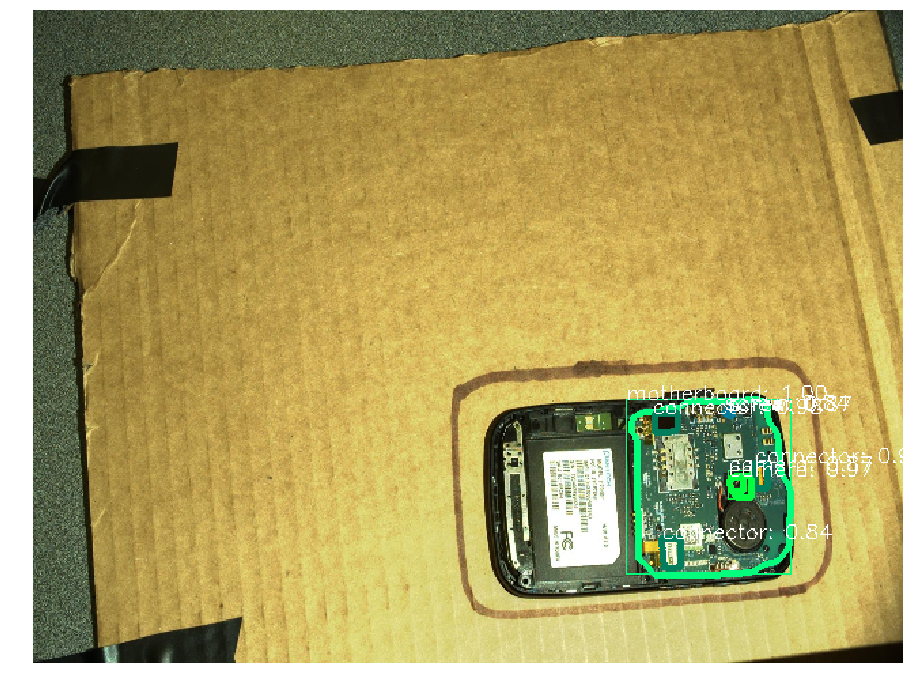

In [59]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

# Save ground trouth and prediction

In [85]:
html = coco_dataset.display_image(image_id, use_url=False)
html = html.replace('img src="../', 'img src="/home/q/kashapov/maskrcnn-benchmark/')
imgkit.from_string(html, 'ground_trouth.png')

Image:
  height: 480
  width: 640
  id: 4
  file_name: 6_color.png
  segmentations (8):
    20:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    21:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    22:red:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    23:green:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    24:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    25:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    26:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    27:gold:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}


OSError: wkhtmltoimage reported an error:
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
[>                                                           ] 0%[==============================>                             ] 50%[============================================================] 100%Rendering (2/2)                                                    
[>                                                           ] 0%[===============>                                            ] 25%Error: Could not save image                                       
[============================================================] 100%Done                                                               
Exit with code 1, due to unknown error.


In [68]:
im = Image.fromarray(predictions)
im.save("predictions.png", "PNG")